# Part 1 : 

## Using Facenet via wrappers 

### Defining Comparator Function using face_recognition lib :

In [111]:
import face_recognition as fr

def compare_faces(first_img_path, second_img_path):
    first_img = fr.load_image_file(first_img_path) 
    second_img = fr.load_image_file(second_img_path)

    first_img_enc = fr.face_encodings(first_img)[0]
    second_img_enc = fr.face_encodings(second_img)[0]

    result = fr.compare_faces([first_img_enc], second_img_enc, tolerance = 0.7) 
    if(result[0]):
        print("same person")
    else:
        print("not the same person")

## Evaluation :

In [112]:
ronaldo1 = "./pics/cr7-1.jpg"
ronaldo2 = "./pics/cr7-2.jpg"
messi1 = "./pics/messi1.jpg"
messi2 = "./pics/messi2.jpg" 

In [113]:
compare_faces(ronaldo1, ronaldo2)
compare_faces(messi1, messi2)
compare_faces(ronaldo1, messi1)
compare_faces(ronaldo1, messi2)
compare_faces(ronaldo2, messi1)
compare_faces(ronaldo2, messi2)

same person
same person
not the same person
not the same person
not the same person
not the same person


# Part 2 : 

###         Using FaceNet And MTCNN Directly : 

In [114]:
from mtcnn import MTCNN
from keras_facenet import FaceNet 
import tensorflow as tf 
import cv2 
import numpy as np 
from scipy.spatial.distance import cosine 
import math
import os 
import sys
from skimage import io 
import numpy as np
import matplotlib.pyplot as plt

In [115]:
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [116]:
class FaceComparator: 
    
    def __init__(self): 
        self.detector = MTCNN() 
        self.embedder = FaceNet() 
        
    def extract_face(self, image_path):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        x1, y1, w, h = self.detector.detect_faces(image)[0]['box']
        x1 = abs(x1) 
        y1 = abs(y1) 
        x2 = x1 + w 
        y2 = y1 + h 

        face = image[y1:y2, x1:x2]
        face = cv2.resize(face, (100,100))
        face = np.expand_dims(face, axis = 0) 
        return face
    
    
    def get_embeddings(self, image):
        embeddings =  self.embedder.embeddings(image)
        return embeddings[0]        
          
    def show_faces(self, first_face_vect, second_face_vect):
        row = 1 
        col = 2 
        fig = plt.figure()
        fig.add_subplot(row, col, 1)
        plt.imshow(first_face_vect)
        fig.add_subplot(row, col, 2)
        plt.imshow(second_face_vect)
        
    def euclid(self, vect1, vect2):
        return np.sum((vect1 - vect2)**2)
    
    def compare_faces(self, first_image_path, second_image_path):
        
        with HiddenPrints():
            first_face = self.extract_face(first_image_path) 
            second_face = self.extract_face(second_image_path) 
            
            self.show_faces(first_face[0], second_face[0])
            
            f1_emb = self.get_embeddings(first_face)
            f2_emb = self.get_embeddings(second_face)
        
        cosine_dist = cosine(f1_emb, f2_emb) 
        euclid_dist = self.euclid(f1_emb, f2_emb) 
        
        print("Cosine Distance : " + str(cosine_dist))
        print("Euclid Distance : " + str(euclid_dist))
        result = True if cosine(f1_emb, f2_emb) < .6 else False 

        return "Prediction : Same" if result else "Prediction : Not the same!"
    

In [117]:
face_comparator = FaceComparator() 

Cosine Distance : 0.21868371963500977
Euclid Distance : 0.43736738


'Prediction : Same'

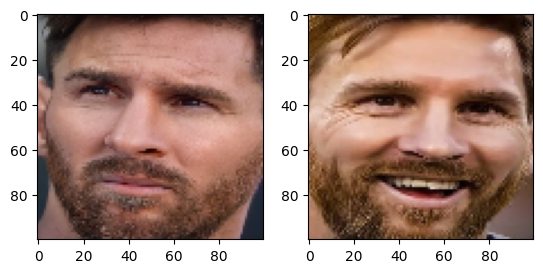

In [118]:
face_comparator.compare_faces(messi1, messi2)

Cosine Distance : 0.0684882402420044
Euclid Distance : 0.13697667


'Prediction : Same'

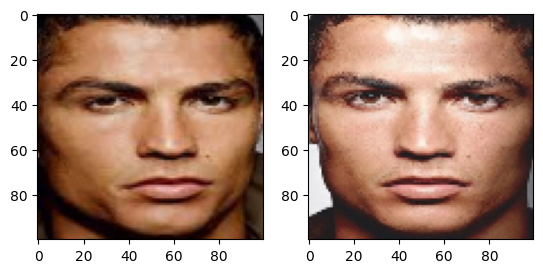

In [119]:
face_comparator.compare_faces(ronaldo1, ronaldo2)

Cosine Distance : 0.9401626586914062
Euclid Distance : 1.8803253


'Prediction : Not the same!'

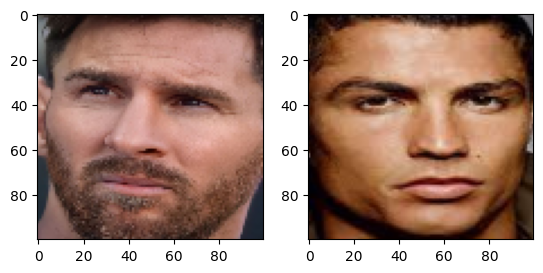

In [120]:
face_comparator.compare_faces(messi1, ronaldo1)

Cosine Distance : 0.9319292902946472
Euclid Distance : 1.8638586


'Prediction : Not the same!'

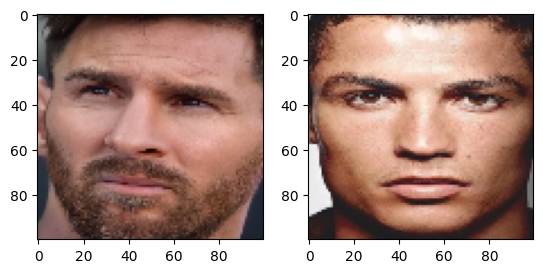

In [121]:
face_comparator.compare_faces(messi1, ronaldo2)

Cosine Distance : 0.9757729284465313
Euclid Distance : 1.9515458


'Prediction : Not the same!'

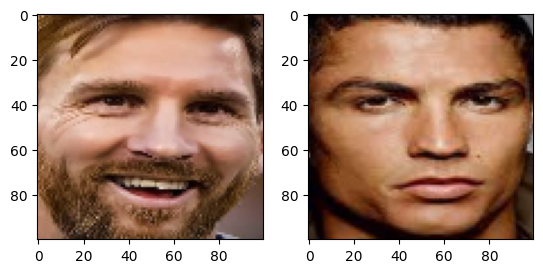

In [122]:
face_comparator.compare_faces(messi2, ronaldo1)

Cosine Distance : 0.9861131981015205
Euclid Distance : 1.9722265


'Prediction : Not the same!'

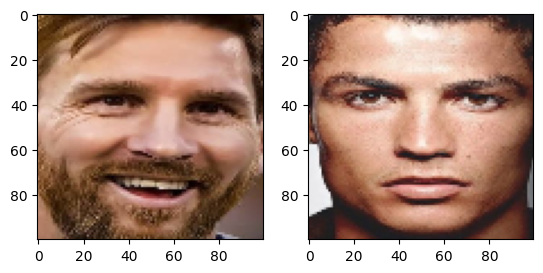

In [123]:
face_comparator.compare_faces(messi2, ronaldo2)